In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from json_parser_depscan import create_df

In [2]:
df= create_df()
print(df)

      VulnerabilityID                PkgName             Status Severity  \
0      CVE-2023-50387         debian:systemd            255.4-1   MEDIUM   
1       CVE-2023-5678         debian:openssl           3.0.12-2   MEDIUM   
2       CVE-2024-0553        debian:gnutls28            3.8.4-2   MEDIUM   
3       CVE-2024-2398   debian:bookworm/curl                         LOW   
4       CVE-2024-0567        debian:gnutls28            3.8.4-2   MEDIUM   
...               ...                    ...                ...      ...   
18676  CVE-2020-19189   ubuntu:jammy/ncurses     6.3-2ubuntu0.1   MEDIUM   
18677   CVE-2023-5156     ubuntu:jammy/glibc    2.35-0ubuntu3.5   MEDIUM   
18678  CVE-2023-23914      ubuntu:jammy/curl  7.81.0-1ubuntu1.8      LOW   
18679   CVE-2022-3515   ubuntu:jammy/libksba   1.6.0-2ubuntu0.1     HIGH   
18680  CVE-2020-35342  ubuntu:jammy/binutils      2.38-3ubuntu1   MEDIUM   

      Container  
0         httpd  
1         httpd  
2         httpd  
3         httpd

<Axes: >

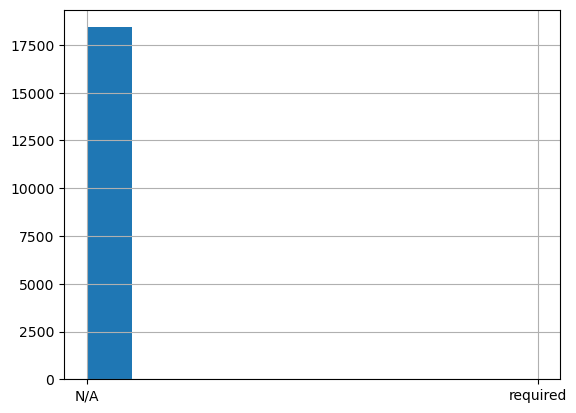

In [3]:
df['Status'].hist()

<Axes: >

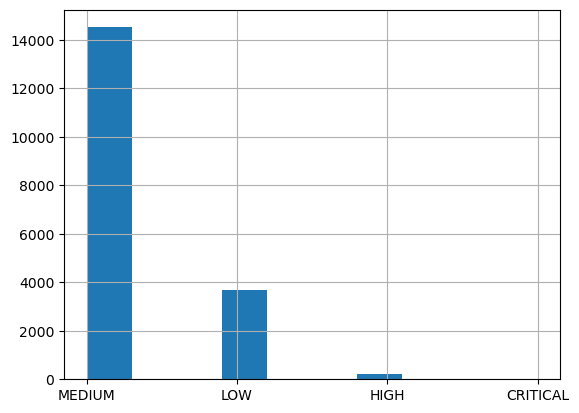

In [4]:
df['Severity'].hist()

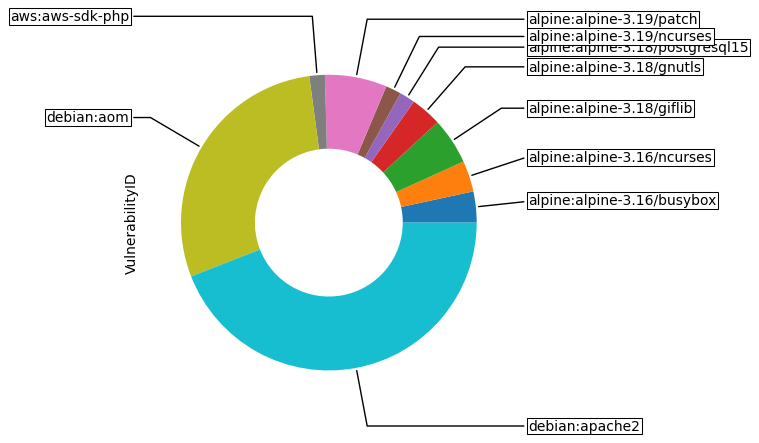

In [5]:
import numpy as np
import random
df_plot = df.groupby(['PkgName']).count().head(10)
axes = df_plot.plot.pie(y='VulnerabilityID', startangle=0, radius=1, legend=None, labels=None, wedgeprops=dict(width=0.5))
wedges = axes.patches
bbox_props = dict(boxstyle="square,pad=0.1", fc="w", ec="k", lw=0.75)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=1, va="center")

for i, p in enumerate(wedges):
    name_df = df_plot.iloc[[i]].index.tolist()[0]
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = f"angle,angleA=0,angleB={ang}"
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    axes.annotate(name_df, xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

In [7]:
len(df.loc[df['Severity'] == "HIGH"])

208

In [8]:
len(df.loc[df['Container'] == "ruby"])

1387

In [10]:
dfa = df.loc[df['Container'] == "ruby"]
len(dfa.loc[dfa['Severity'] == "HIGH"])

1

In [7]:
df_aff = df.loc[df['Container'].isin(["almalinux", "eggdrop", "teamspeak", "nats", "busybox", "photon", "sl", "traefik"])]

In [8]:
print(df_aff.loc[df_aff['Status'].isin([""])])

Empty DataFrame
Columns: [VulnerabilityID, PkgName, Status, Severity, Container]
Index: []


In [3]:
df = df[~df['VulnerabilityID'].str.contains('CVE', na=False)]
print(df)
df = df[~df['VulnerabilityID'].str.contains('TEMP', na=False)]
print(df)

           VulnerabilityID                      PkgName            Status  \
21              DSA-5460-1        debian:debian-12/curl              None   
29              DSA-5678-1       debian:debian-12/glibc              None   
37              DSA-5514-1       debian:debian-12/glibc              None   
62              DSA-5650-1  debian:debian-12/util-linux  2.38.1-5+deb12u1   
71              DSA-5532-1     debian:debian-12/openssl  3.0.11-1~deb12u2   
...                    ...                          ...               ...   
18164           DSA-5532-1     debian:debian-12/openssl  3.0.11-1~deb12u2   
18170           DSA-5650-1  debian:debian-12/util-linux  2.38.1-5+deb12u1   
18172          NPM-1096366               npm:nodemailer             6.9.9   
18211  GHSA-36jr-mh4h-2g58                 npm:d3-color             3.1.0   
18290  GHSA-9h6g-pr28-7cqp               npm:nodemailer             6.9.9   

      Severity      Container  
21         LOW          httpd  
29         